<img src="https://i.ibb.co/K5n24Nd/1.png"  alt="KCode Banner alpha"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>


# Análise exploratório de dados

## Metodologia / Passos:
*  Fazer em excel um dataframe com as intereseccoes das datas e puxar `ok`
* Fazer um dataframe com todos os valores das ações das empresas empresas no periodo `ok`
* Tirar a média `ok`
* Calcular a variação  `ok`
* Criar um outro dataframe com a tx Selic `ok`
* Calcular a variação  `ok`
* Fazer a análise exploratória 
    Validar ou não, a hipótese de que é mais vantajoso investir em ações do setor siderúrgico do que do que no tesouro direto (LFT)

In [1]:
# Importando libs
import pandas as pd
from random import randint
from datetime import date
import matplotlib.pyplot as plt


# Criando o nossa série temporal

In [2]:
# Puxando os dados
dir = 'C:/Users/manda/OneDrive/Documents/GitHub/Insights/Setor Siderúrgico Nacional/2 Entrega - Cliclo 2/Passo 03 e 04 - Coleta e limpeza dos dados/DataFrames/DF pronto para análise pandas.csv'
df = pd.read_csv(dir, skiprows=1, encoding='UTF8')
# Dropando coluna desnecessária
df = df.drop(columns=['Unnamed: 0'])
df


,Data,Vale,Gerdau Pref,Gerdau Met Pref,CSN,Usiminas,Selic
0,1/31/2000,1.951422,268.362579,0.219444,1.667136,1.731119,1.46
1,2/29/2000,1.658708,263.639343,0.231984,1.566680,1.566250,1.45
2,3/31/2000,1.626185,244.209869,0.200635,1.754768,1.426112,1.45
3,4/28/2000,1.626185,234.012115,0.219444,1.453400,1.244756,1.30
4,5/31/2000,1.700176,1.252358,0.980719,1.709883,1.318947,1.49
...,...,...,...,...,...,...,...
258,3/31/2022,90.889160,29.354248,22.675573,25.608978,13.254291,0.93
259,4/29/2022,79.185761,26.648436,20.724682,20.729202,11.310000,0.83
260,5/31/2022,81.961868,28.365076,22.144821,21.840000,10.960000,1.03
261,6/30/2022,72.787384,21.733269,17.251686,15.440000,8.650000,1.02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Data             263 non-null    object 
 1   Vale             263 non-null    float64
 2   Gerdau Pref      263 non-null    float64
 3   Gerdau Met Pref  263 non-null    float64
 4   CSN              263 non-null    float64
 5   Usiminas         263 non-null    float64
 6   Selic            263 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.5+ KB


## A data esta no formato str, vamos corrigir:

In [4]:
# Transformando a coluna 'Data' em 'TimeStamp'
df['Data']= pd.to_datetime(df['Data'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             263 non-null    datetime64[ns]
 1   Vale             263 non-null    float64       
 2   Gerdau Pref      263 non-null    float64       
 3   Gerdau Met Pref  263 non-null    float64       
 4   CSN              263 non-null    float64       
 5   Usiminas         263 non-null    float64       
 6   Selic            263 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 14.5 KB


In [6]:
# Transformando a coluna 'Data' em DateTimeIndex
index = pd.DatetimeIndex(df['Data'])
df.set_index('Data', inplace=True)
df

,Vale,Gerdau Pref,Gerdau Met Pref,CSN,Usiminas,Selic
Data,,,,,,
2000-01-31,1.951422,268.362579,0.219444,1.667136,1.731119,1.46
2000-02-29,1.658708,263.639343,0.231984,1.566680,1.566250,1.45
2000-03-31,1.626185,244.209869,0.200635,1.754768,1.426112,1.45
2000-04-28,1.626185,234.012115,0.219444,1.453400,1.244756,1.30
2000-05-31,1.700176,1.252358,0.980719,1.709883,1.318947,1.49
...,...,...,...,...,...,...
2022-03-31,90.889160,29.354248,22.675573,25.608978,13.254291,0.93
2022-04-29,79.185761,26.648436,20.724682,20.729202,11.310000,0.83
2022-05-31,81.961868,28.365076,22.144821,21.840000,10.960000,1.03


## Agora antes de tirar a média entre as 5 vamos verificar se existem séries outliers.

<AxesSubplot:xlabel='Data'>

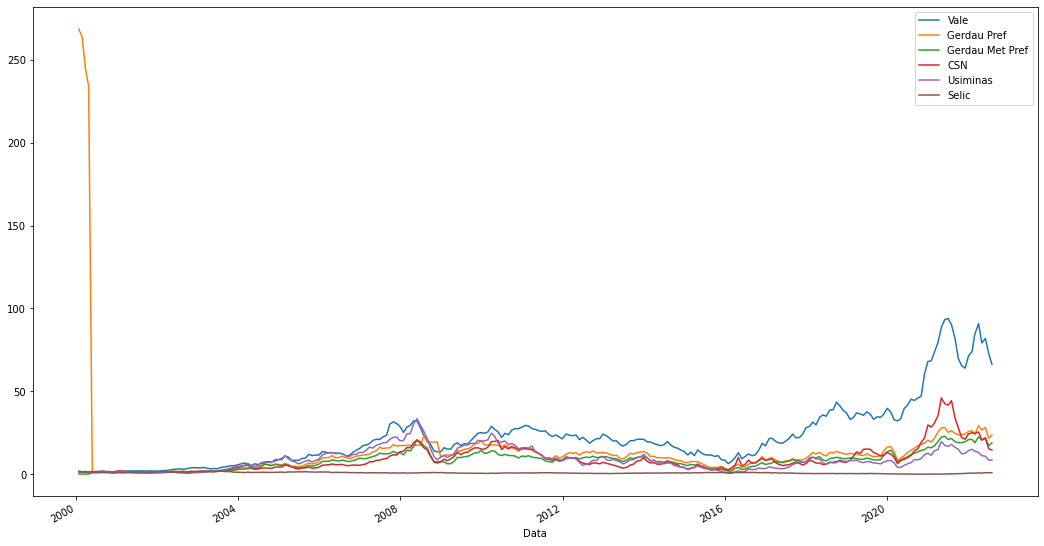

In [7]:
df.plot(figsize=(18, 10))


## Podemos ver que nos anos 2000~+- 2003 os valores estão inconsistentes.
   Decidi pela remoção, porque além de eu não ter alta confiança nesses dados muito antigos, visto que em 5 fontes de dados só achei eles em duas, e ainda não batiam 100%.  
   Também tem o fato de se tratar de dados muito antigos, ou seja, não terão mais tão grande impacto na nossa análise, hoje, 22 anos depois, do que dados mais recentes.

Então vamos remover este periodo.

<AxesSubplot:xlabel='Data'>

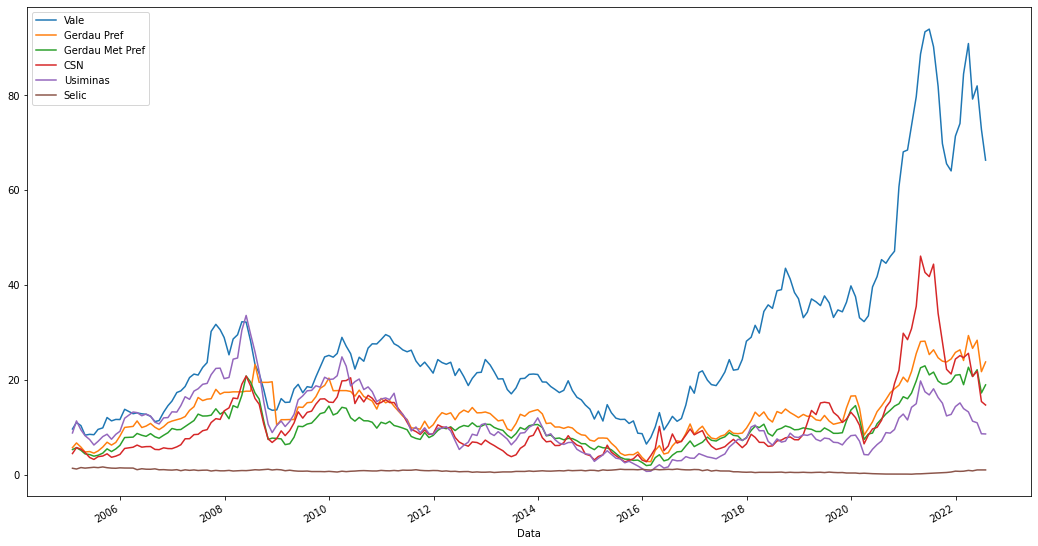

In [8]:
# Removendo o periodo:
# df = df[(df_var.index >= data_inicial) & (df_var <= data_atual)]
df = df[df.index >= '01-01-2005']
df.plot(figsize=(18,10))

# Modelando nossos dados

In [9]:
# Inserindo uma coluna com a média do valor das ações
df['Média ações'] = ((df['Vale'] + df['Gerdau Pref'] + df['Gerdau Met Pref'] + df['CSN'] +df['Usiminas'])/5).copy()


C:\Users\manda\AppData\Local\Temp\ipykernel_15384\2040653476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Média ações'] = ((df['Vale'] + df['Gerdau Pref'] + df['Gerdau Met Pref'] + df['CSN'] +df['Usiminas'])/5).copy()


<AxesSubplot:xlabel='Data'>

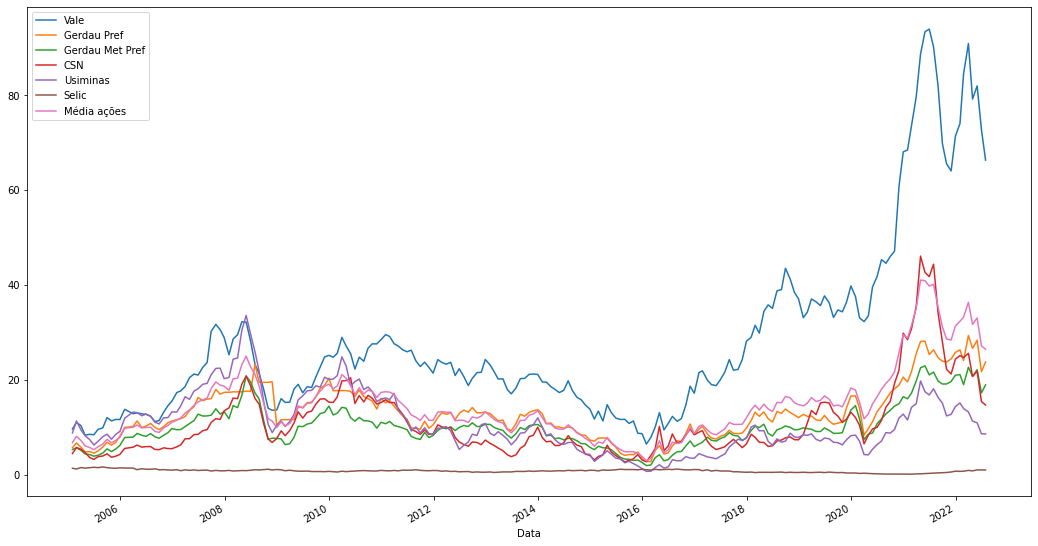

In [10]:
df.plot(figsize=(18,10))

## Calculando a variância percentual

In [11]:
# Reduzindo o dataframe
df_filtrado = df[['Média ações', 'Selic']]
df_filtrado

,Média ações,Selic
Data,,
2005-01-31,6.803605,1.38
2005-02-28,8.114535,1.22
2005-03-31,7.253750,1.53
2005-04-29,6.107266,1.41
2005-05-31,5.757101,1.50
...,...,...
2022-03-31,36.356450,0.93
2022-04-29,31.719616,0.83
2022-05-31,33.054353,1.03


In [12]:
# Cálculando variação percentual
df_filtrado.insert(loc = 1, column = 'Δ% Ações', value = round(df_filtrado['Média ações'].pct_change()*100, 2))
df_filtrado.insert(loc = 3, column = 'Δ% Selic', value = round(df_filtrado['Selic'].pct_change()*100, 2))

<AxesSubplot:xlabel='Data'>

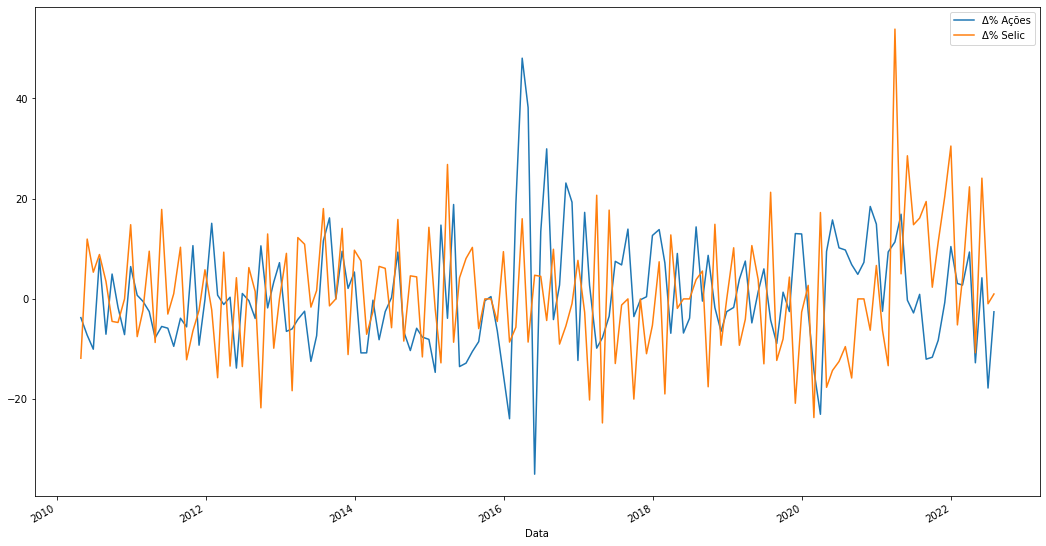

In [26]:
# Criando um data frame só com as variáveis

df_var = df_filtrado[['Δ% Ações', 'Δ% Selic']]
df_var.plot(figsize=(18,10))

# AJUDA AQUI:
# AJUDA AQUI:
# AJUDA AQUI:
# AJUDA AQUI:
* Eu quero fazer este mesmo gráfico acima, só que agrupando as datas(que estão no INDEX), por ano, só que não estou conseguindo dar o groupby no index)
* Não posso tirar elas do index, nem criar outra coluna, tenho que agrupar elas por ano pelo INDEX,

> Finalmente os dados estão modelados e preparados para nossa análise exploratória;

# Análise exploratória dos dados

## Metodologia
* Vou calcular as variações percentuais para os periodos: todo(22a.), 10a, 5a, 3a, 2a, 1a, 6m `ok`
vou plotar um gráfico com as informações supracitadas

In [14]:
# Definido funções para apresentação visual(str) dos resultados
def linha():
    print(33*'-')
def tit():
    linha()
    print(f"{titulo : ^33}")
    linha()
    print('Rendimento:')


In [15]:
titulo = 'Periodo todo(22a.)'

# Calculando as variações:
acoes = df_var['Δ% Ações'].sum()
selic = df_var['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp22a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23}")
print(f"Δ% Selic: {selic : >23}")
linha()
print(f"{maior} renderam  {diferenca}% a mais")
linha()

---------------------------------
       Periodo todo(22a.)        
---------------------------------
Rendimento:
Δ% Ações:      253.95999999999995
Δ% Selic:      116.76000000000003
---------------------------------
Ações renderam  137.19999999999993% a mais
---------------------------------


De cara já vemos que que no período total as ações renderam mais que o dobro do que a selic  
Agora vamos ver nos períodos mais proximos

In [16]:
# Filtrando o periodo:
titulo = '10 anos'
data_atual = '2022-07-29' 
data_inicial = '2012-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]


df_filtrado
#df_filtrado = df_var[(df_var['Data'] >= data_inicial) & (df_var['Data'] <= data_atual)]

,Δ% Ações,Δ% Selic
Data,,
2012-07-31,-0.35,6.25
2012-08-31,-3.90,1.47
2012-09-28,10.59,-21.74
2012-10-31,-1.80,12.96
2012-11-30,3.37,-9.84
...,...,...
2022-03-31,9.36,22.37
2022-04-29,-12.75,-10.75
2022-05-31,4.21,24.10


In [17]:
# Filtrando o periodo:
titulo = '10 anos'
data_atual = '2022-07-29' 
data_inicial = '2012-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp10a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

---------------------------------
             10 anos             
---------------------------------
Rendimento:
Δ% Ações:                  166.27
Δ% Selic:                  143.45
---------------------------------
Ações renderam   22.82% a mais
---------------------------------


In [18]:
# Filtrando o periodo:
titulo = '5 anos'
data_atual = '2022-07-29' 
data_inicial = '2017-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp5a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

---------------------------------
             5 anos              
---------------------------------
Rendimento:
Δ% Ações:                  133.49
Δ% Selic:                   84.08
---------------------------------
Ações renderam   49.41% a mais
---------------------------------


In [19]:
# Filtrando o periodo:
titulo = '3 anos'
data_atual = '2022-07-29' 
data_inicial = '2019-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp3a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

---------------------------------
             3 anos              
---------------------------------
Rendimento:
Δ% Ações:                   66.59
Δ% Selic:                  126.30
---------------------------------
Selic renderam   59.71% a mais
---------------------------------


In [20]:
# Filtrando o periodo:
titulo = '2 anos'
data_atual = '2022-07-29' 
data_inicial = '2010-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp2a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

---------------------------------
             2 anos              
---------------------------------
Rendimento:
Δ% Ações:                  133.12
Δ% Selic:                  132.27
---------------------------------
Ações renderam   0.85% a mais
---------------------------------


In [21]:
# Filtrando o periodo:
titulo = '1 ano'
data_atual = '2022-07-29' 
data_inicial = '2010-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp1a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

---------------------------------
              1 ano              
---------------------------------
Rendimento:
Δ% Ações:                  133.12
Δ% Selic:                  132.27
---------------------------------
Ações renderam   0.85% a mais
---------------------------------


In [22]:
# Filtrando o periodo:
titulo = '3 meses'
data_atual = '2022-07-29' 
data_inicial = '2010-04-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp6m = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

---------------------------------
             3 meses             
---------------------------------
Rendimento:
Δ% Ações:                  112.11
Δ% Selic:                  137.70
---------------------------------
Selic renderam   25.59% a mais
---------------------------------


# Revalidação dos dados

Neste momento paro a análise, e farei uma revalidação dos dados, para saber se os dados continuam   
consistentes, e não se corromperam em algum momento do processo.  
Lembrando que eles já foram validados anteriormente.  
Itens a serem válidados: 
* 3 Valores Selic aleatórios `ok`
* 3 cotações aleatórias
* 1 variação

In [23]:
df.shape

(210, 7)

In [24]:
# Gerando fatores aleatórios para a verificação
rows = [randint(0,263), randint(0,263), randint(0,263)]

In [25]:
# Puxando valores para conferência
linha()
print("Conferência Selic".center(33))
for row in rows:
    linha()
    print(f"{df.index[row].date()} | {df['Selic'][row]}".center(33))
linha()

---------------------------------
        Conferência Selic        
---------------------------------


IndexError: index 211 is out of bounds for axis 0 with size 210

Dados extraídos de contabeis.com.br [Fonte]('https://www.contabeis.com.br/tabelas/selic/')  
<img src="https://i.ibb.co/jJ19bdQ/validacao.png"  alt="Validação"/> 
>Os dados da Selic estão consistentes

In [ ]:
# Gerando novos fatores aleatórios para a verificação

linha()
print('Ações à validar'.center(33))
linha()
colunas = [randint(1,5), randint(1,5), randint(1,5)]
linhas = [randint(0,263), randint(0,263), randint(0,263)]
for c in range (0,3):
    print(f'Colunas: {colunas[c]} | Linha: {linhas[c]}'.center(33))
linha()

In [ ]:
#COLOCAR AQUI UMA MÉDIA FLUTUANTE
#IMPORTANTE VALIDAR ESSES DADOS 